In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("Worksheet_2.ipynb")

# Worksheet 2: KNNs and SVMs


This worksheet is intended to help you revise and reinforce what you've learnt in the lecture.
</br>Please fill in the answers, or write the code, in the space provided.


## Imports

In [3]:
# Load necessary libraries
import numpy as np
import pandas as pd
import math
import sys
from hashlib import sha1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_colwidth", 200)

## Exercise 1: 👽 "The Alien Zoo Adventure" 🛸

Welcome to the Alien Zoo! 
Ah, the power of the vote! As you know, $k$-Nearest Neighbours ($k$-NNs) is a model that's all about numbers. It believes in majority rule, where the value of $k$ decides how many neighbours get to vote during the prediction process.
<br>In this exercise, your mission is to help a young alien named *Zog* find his species group in the zoo using our special tool, $k$NN. We have a map with the locations of different alien groups, but unfortunately, the map doesn't label them! We do have some data on a few aliens and where they belong. Let's use that to help Zog find his family!

| Name  | X (Horizontal Steps) | Y (Vertical Steps) | Alien Group |
|-------|----------------------|--------------------|-------------|
| Vega  | 5                    | 3                  | Jovian      |
| Max   | 3                    | 2                  | Martian     |
| Orion | 3                    | 5                  | Jovian      |
| Stella| 2                    | 1                  | Martian     |
| Luna  | 4                    | 2                  | Martian     |

**<p style="text-align: center;">Zog's Location: ($X$=3, $Y$=3)</p>**

**Guesstimation Game:**

Before diving in, let's play a quick game. Can you guess Zog's alien group just by looking at the map and the known aliens? We will see if math backs your guesswork!


### 1.1 Footstep Calculation!

Zog wants to find the shortest footpath to his family. Let's calculate how many steps Zog is from each known alien using the Footstep Formula:

$$ \text{Footstep Formula:} \sqrt{(x_{\text{alien}} - x_{\text{zog}})^2 + (y_{\text{alien}} - y_{\text{zog}})^2} $$

**Your Task:**
<br>Now in the following code, substitute `alien_location` for each alien, and keep track of the distances in the solution code cell.

In [4]:
zog_location = (3, 3)
alien_location = (4, 2)  # Change for each alien
footstep_distance = math.sqrt((alien_location[0] - zog_location[0])**2 + (alien_location[1] - zog_location[1])**2)
print(footstep_distance)

1.4142135623730951


<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 3

In [5]:
# Answer should be number with at least one decimal point (x.x)
alien_location = (5, 3)
distance_Vega = math.sqrt((alien_location[0] - zog_location[0])**2 + (alien_location[1] - zog_location[1])**2)
print(distance_Vega)

alien_location = (3, 2)
distance_Max = math.sqrt((alien_location[0] - zog_location[0])**2 + (alien_location[1] - zog_location[1])**2)
print(distance_Max)

alien_location = (3, 5)
distance_Orion = math.sqrt((alien_location[0] - zog_location[0])**2 + (alien_location[1] - zog_location[1])**2)
print(distance_Orion)

alien_location = (2, 1)
distance_Stella = math.sqrt((alien_location[0] - zog_location[0])**2 + (alien_location[1] - zog_location[1])**2)
print(distance_Stella)

alien_location = (4, 2)
distance_Luna = math.sqrt((alien_location[0] - zog_location[0])**2 + (alien_location[1] - zog_location[1])**2)
print(distance_Luna)

...

2.0
1.0
2.0
2.23606797749979
1.4142135623730951


Ellipsis

In [6]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

### 1.2 Shuffle and Whistle for $k$=2

Zog has a whistle that can call the nearest aliens to him. If he blows it lightly, it'll call two aliens.

1. Which two aliens come to Zog first? Type their initial in the code cell bellow.
2. Based on the alien groups of these two, where should Zog go?
    - A) Jovian Group
    - B) Martian Group


<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [7]:
answer_1 = ['M', 'L'] # Answer should be list, for example ['V','M']
answer_2 = 'B' # Answer should be 'A' or 'B'

...

Ellipsis

In [8]:
grader.check("q1.2")

q1.2 results: All test cases passed!

### 🔗 Pause and Ponder!

Thanks for helping Zog find his closest neighbors and his home. 🌌👽💃

In our exercise, Zog effortlessly found his two closest neighbors. But what if there was a tie, where multiple aliens were equidistant to Zog for the last spot? How might you decide between them? Consider the implications of ties in $k$NN. What strategies could you employ to resolve such ties in a way that is both fair and meaningful? 🌠🤔

<br><br><br><br>

## Exercise 2: Iris flower classification using KNNs and SVM RBFs

|               |                               | |
| :--------------------------------------- | :-----------------   | :-----------------   | 
| <img src="img/iris_setosa.jpg" alt="setosa" class="bg-primary" width="200px"/>|<img src="img/iris_versicolor.jpg" alt="versicolor" class="bg-primary" width="200px"/> |<img src="img/iris_virginica.jpg" alt="virginica" class="bg-primary" width="200px"/>|

Let's start by loading and splitting the dataset. 

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
pd.DataFrame(X_train, columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,7.4,2.8,6.1,1.9
1,6.0,2.2,5.0,1.5
2,4.7,3.2,1.6,0.2
3,5.1,3.5,1.4,0.2
4,6.0,2.2,4.0,1.0
...,...,...,...,...
115,5.1,3.5,1.4,0.3
116,5.1,2.5,3.0,1.1
117,5.6,3.0,4.5,1.5
118,6.2,2.8,4.8,1.8


<br><br>

### 2.1 Dummy classifier

**Your tasks:**

- Carry out 5-fold cross validation using the `DummyClassifier` and store the mean cross-validation score in the `mean_cv_score` variable below.  

_Points:_ 1

In [11]:
from sklearn.dummy import DummyClassifier
dt = DummyClassifier(random_state=123)
dt.fit(X_train, y_train)

mean_cv_score = cross_validate(dt, X_train, y_train, cv = 5, return_train_score = True)['train_score'].mean()
...

Ellipsis

In [12]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

### 2. Optimizing $k$ in KNNs 

In this exercise, you will be searching through various values of `k` (referred to as `n_neighbors` in sklearn) as provided below.

**Your tasks:**

For each `n_neighbors` value in the param_grid below:
- Perform a 5-fold cross-validation.
- Compute the mean train score (mean_train_score), mean cross-validation score (mean_cv_score), standard deviation of train scores (std_train_score), and standard deviation of cross-validation scores (std_cv_score).
- Store these computed values in their respective lists within the `results_dict` provided below.

_Points:_ 4

In [18]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 40, 4).tolist()

results_dict = {
    "n_neighbors": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}


for neighbor in n_neighbors:
    neigh = KNeighborsClassifier(n_neighbors=neighbor)
    scores = cross_validate(neigh, X_train, y_train, return_train_score=True, cv=5)
    results_dict['n_neighbors'].append(neighbor)
    results_dict['mean_train_score'].append(scores['train_score'].mean())
    results_dict['mean_cv_score'].append(scores['test_score'].mean())
    results_dict['std_cv_score'].append(scores['test_score'].std())
    results_dict['std_train_score'].append(scores['train_score'].std())

...

Ellipsis

In [19]:
results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("n_neighbors")
results_df

,mean_train_score,mean_cv_score,std_cv_score,std_train_score
n_neighbors,,,,
1,1.000000,0.958333,0.045644,0.000000
5,0.983333,0.966667,0.048591,0.008333
9,0.979167,0.975000,0.033333,0.011411
13,0.977083,0.966667,0.048591,0.016667
17,0.972917,0.958333,0.064550,0.014130
21,0.964583,0.958333,0.045644,0.014130
25,0.960417,0.966667,0.048591,0.015309
29,0.958333,0.941667,0.056519,0.023754
33,0.939583,0.925000,0.055277,0.012148


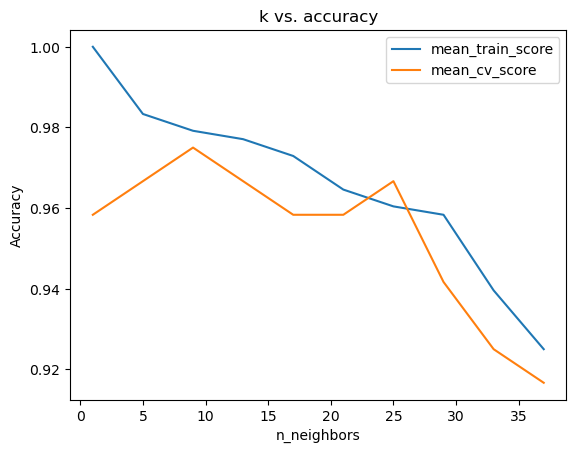

In [20]:
results_df[['mean_train_score', 'mean_cv_score']].plot(ylabel='Accuracy', title="k vs. accuracy");

In [21]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

## Playground 🌿🔍

In this interactive playground, we will investigate how various algorithms create decision boundaries to distinguish between these flower species using their sepal length and width as features. By adjusting the parameters, you can observe how the decision boundaries change, which can result in either overfitting (where the model fits the training data too closely) or underfitting (where the model is too simplistic).

- With **k-Nearest Neighbours ($k$-NN)**, you'll determine how many neighboring flowers to consult. Should we rely on a single nearest neighbor, potentially leading to a more complex, wiggly boundary? Or should we consider a wider group, leading to a smoother but potentially more generalized decision boundary?

- With **Support Vector Machine (SVM)** using the RBF kernel, you'll tweak the hyperparameters `C` and `gamma` to explore the tightrope walk between overly complex boundaries (that might overfit) and overly broad ones (that might underfit).

Observe the process of crafting and refining decision boundaries, one parameter at a time! Be sure to take breaks to reflect on the results you are observing. 

In order to run the code below, you need `ipywidgets` in the cpsc330 conda environment and `jupyter_widgets` in the conda base environment (or wherever your Jupyter Lab is installed). 

- `conda install -n base -c conda-forge jupyterlab_widgets`
- `conda install -n cpsc330 -c conda-forge ipywidgets`

In [ ]:
#load dataset
from IPython.display import clear_output, Image
from ipywidgets import interact, FloatSlider, IntSlider, FloatLogSlider
import mglearn

iris = load_iris(as_frame=True)
iris_df = iris['data']
iris_df['species'] = iris['target']
iris_df = iris_df[iris_df['species'] > 0]
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

def train_and_visualize_svm(c, gamma, ax):
    svc = SVC(C=c, gamma=gamma, random_state=42)
    svc.fit(X_train.values, y_train)
    mglearn.plots.plot_2d_separator(svc, X_train.values, fill=True, alpha=0.4, ax=ax)
    mglearn.discrete_scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], y_train, ax=ax)
    train_score = np.round(svc.score(X_train.values, y_train), 2)
    test_score = np.round(svc.score(X_test.values, y_test), 2)
    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('sepal width (cm)')
    ax.set_title(f"SVM (C={c}, gamma={gamma})\n train = {train_score}\ntest = {test_score}")

def train_and_visualize_knn(n_neighbors, ax):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train.values, y_train)    
    mglearn.plots.plot_2d_separator(knn, X_train.values, fill=True, alpha=0.4, ax=ax)
    mglearn.discrete_scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], y, ax=ax)
    train_score = np.round(knn.score(X_train.values, y_train), 2)
    test_score = np.round(knn.score(X_test.values, y_test), 2)
    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('sepal width (cm)')
    ax.set_title(f"k-NN (n_neighbors={n_neighbors})\n train = {train_score}\ntest = {test_score}")    

def train_and_visualize_tree(max_depth, ax):
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train.values, y_train)
    mglearn.plots.plot_2d_separator(dt, X_train.values, fill=True, alpha=0.4, ax=ax)
    mglearn.discrete_scatter(X['sepal length (cm)'], X['sepal width (cm)'], y, ax=ax)
    train_score = np.round(dt.score(X_train.values, y_train), 2)
    test_score = np.round(dt.score(X_test.values, y_test), 2)    
    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('sepal width (cm)')
    ax.set_title(f"Decision Tree (max_depth={max_depth})\n train = {train_score}\ntest = {test_score}")

def update(c=1.0, gamma=1.0, n_neighbors=5, max_depth=3):
    clear_output(wait=True)  # clear the entire output before plotting
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))  # create a figure with three subplots side by side
    train_and_visualize_svm(c, gamma, axes[0])
    train_and_visualize_knn(n_neighbors, axes[1])
    train_and_visualize_tree(max_depth, axes[2])
    plt.tight_layout()
    plt.show()

# Visualize!
interact(
    update, 
    #c=FloatSlider(min=0.5, max=10, step=0.5, value=1),
    c = FloatLogSlider(value=1.0, base=10, 
                       min=1, # mix exponent of base
                       max=6, # max exponent of base
                       step=1, # exponent step
                       description='C'),   
    gamma = FloatLogSlider(value=1.0, base=10, 
                       min=-3, # mix exponent of base
                       max=5, # max exponent of base
                       step=1, # exponent step
                       description='gamma'),   

    n_neighbors=IntSlider(min=1, max=40, step=5, value=5),
    max_depth=IntSlider(min=1, max=20, step=2, value=3)
);

🔎 **Challenge:** Now that you've had a chance to play around with this interactive model, what patterns do you notice as you adjust the sliders? How does the look of the decision boundary change? Which model seems to be more sensitive to parameter changes?

🔎 **Challenge:** Up until now, we have learned how to apply K-nearest neighbors (KNNs) and Support Vector Machines with radial basis function (SVM RBF) for classification tasks. However, it's worth noting that these techniques can also be employed for regression tasks. Try [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) and [`SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) to make predictions regarding the progression of diabetes one year after a baseline for a group of diabetes patients, using the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html) provided by sklearn.